In [62]:
# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2
import os
import sys
import random
import multiprocessing
module_path = os.path.abspath(os.path.join('./')) # or the path to your source code
sys.path.insert(0, module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
%reload_ext autoreload

# Defining the Main Class

### Using deepso around the rosenbrock function

In [64]:
scenario_table = {}

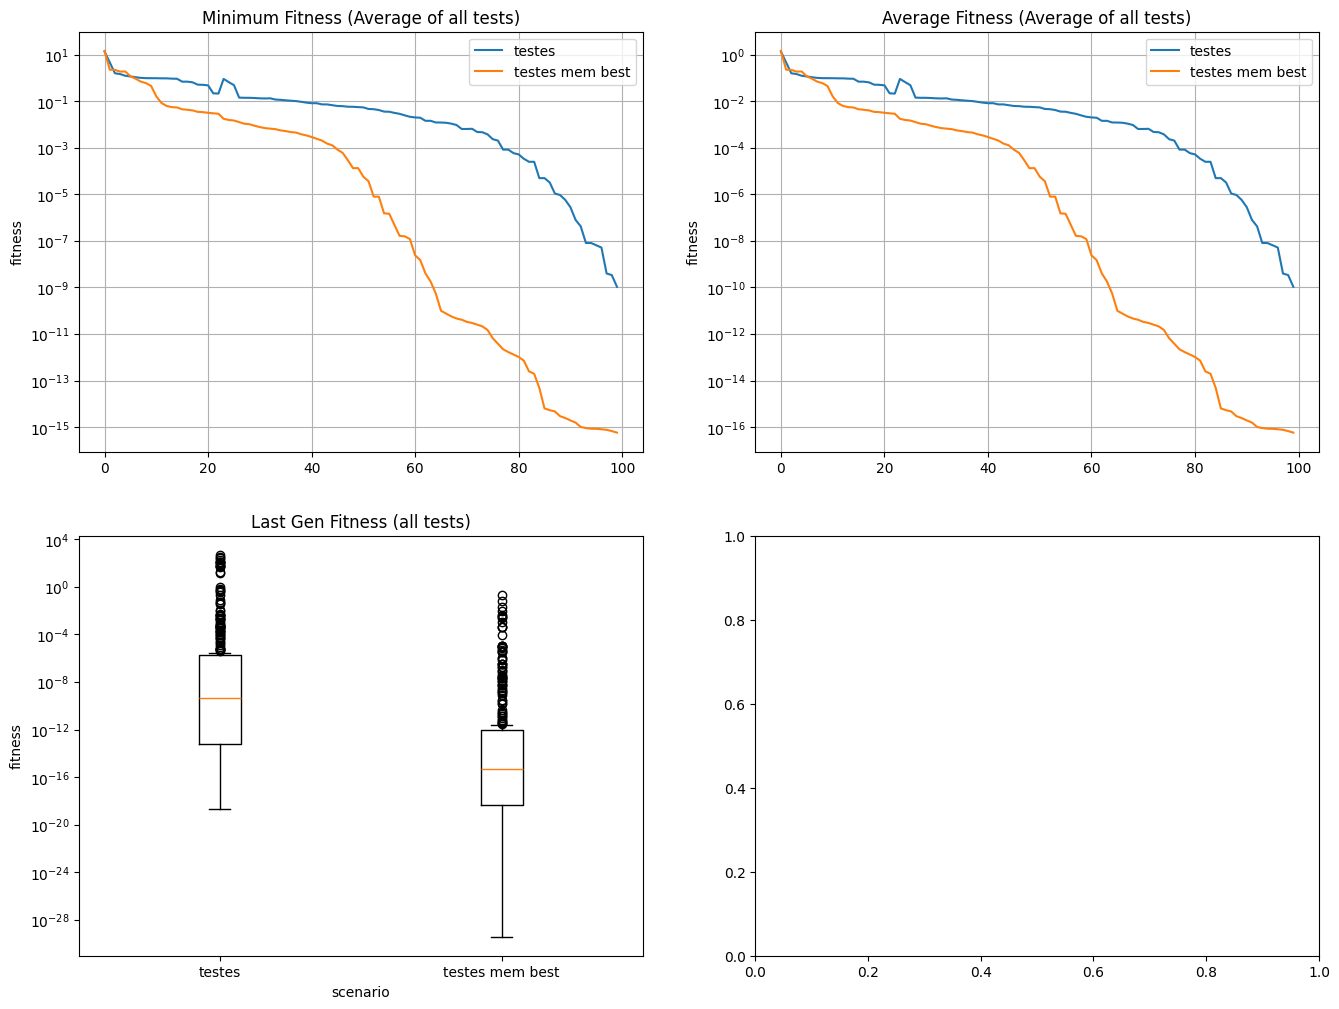

In [142]:
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualDEEPSO
import numpy as np

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
experiment_name="deepso_rand_1"
title="testes"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 10 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(title,"deepso_rand_1", bounds,
                    population_size=population_size,
                    max_it=max_it,
                    tcom=0.9,
                    tmut=0.1,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=2, center=[1,1],seed=num*3)
  generation_data = deepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
#contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animationDEEPSO.mp4",max_it=30)
#from IPython.display import Video
#Video("animationDEEPSO.mp4")

### testing memory best

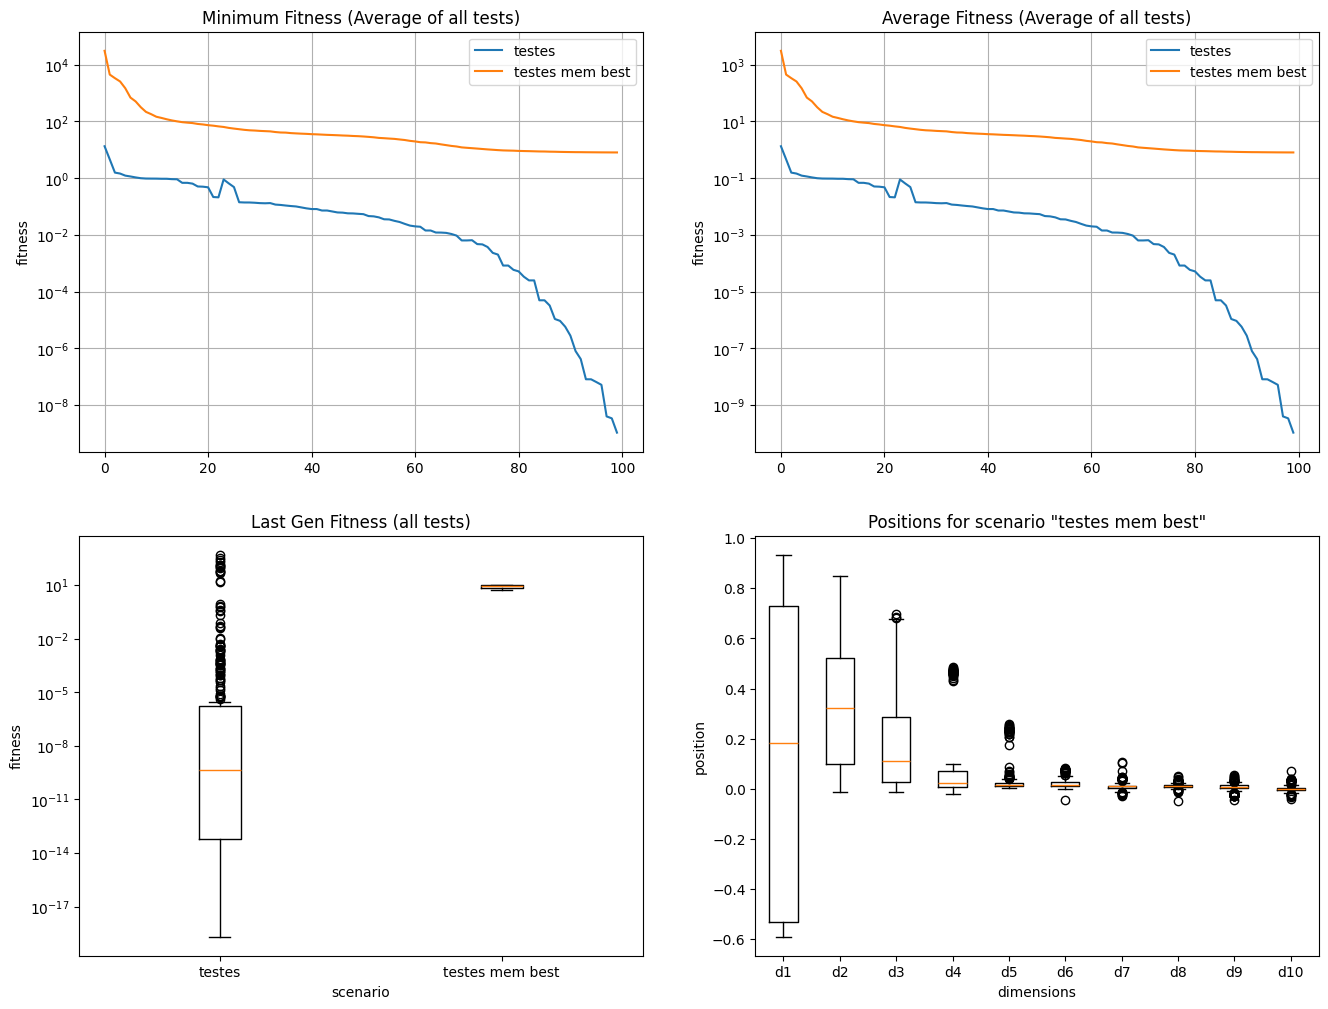

<Figure size 1000x1000 with 0 Axes>

In [153]:
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualDEEPSO
import numpy as np

class Rosenbrock(IndividualDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
title="testes mem best"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 10 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
deepso = LoopDEEPSO(title,"deepso_memory_best", bounds,
                    population_size=population_size,
                    max_it=max_it,
                    tcom=0.9,
                    tmut=0.1,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=10)
  generation_data = deepso.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

#plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animationDEEPSO.mp4",max_it=30)
#from IPython.display import Video
#Video("animationDEEPSO.mp4")

## testing cdeepso

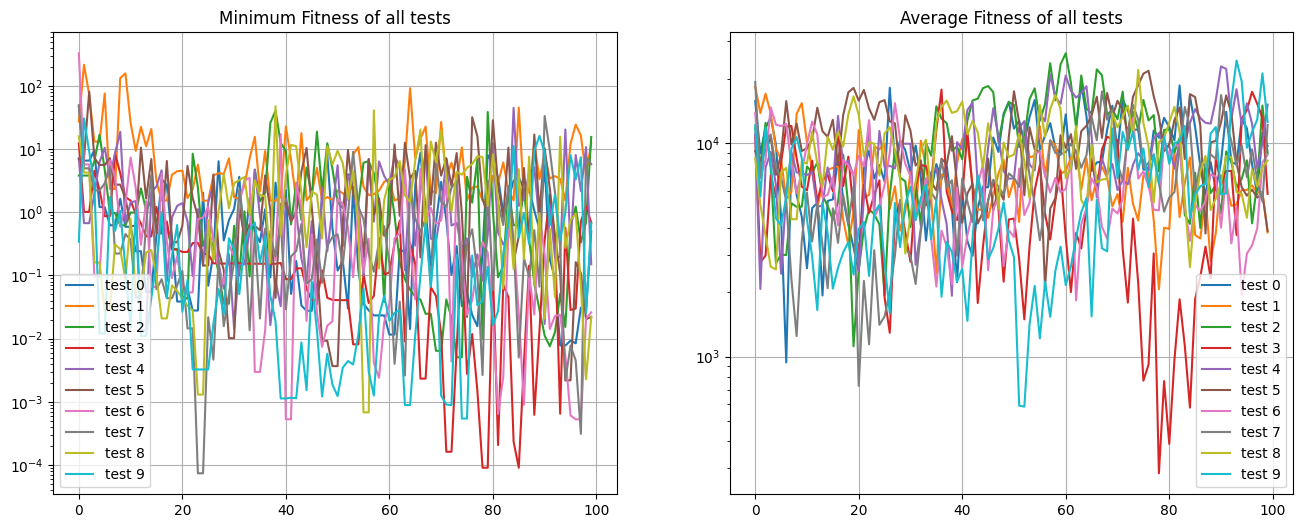

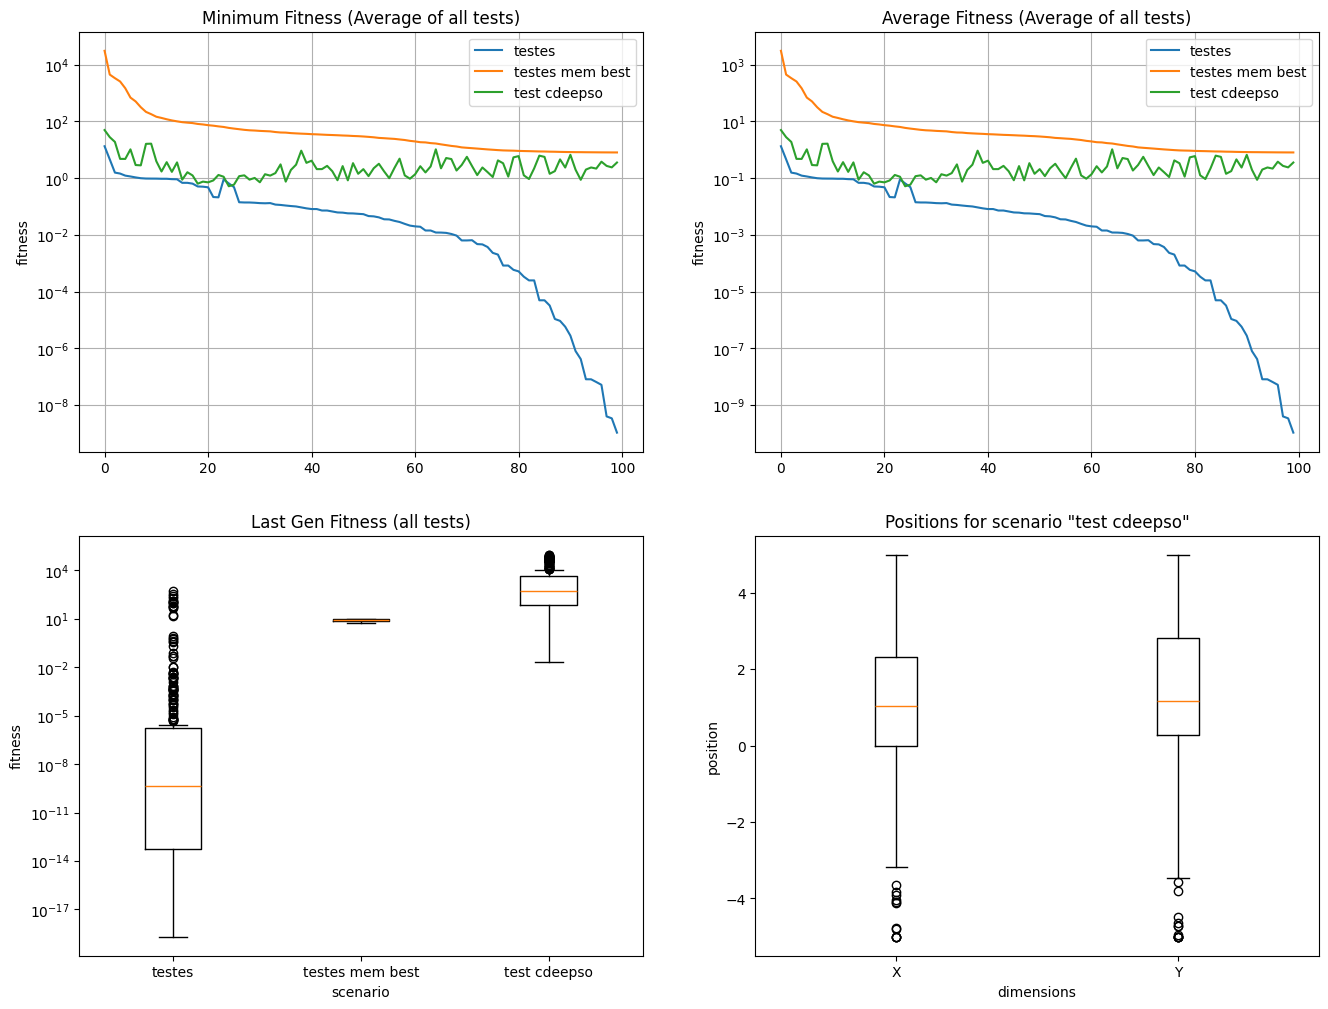

<Figure size 1000x1000 with 0 Axes>

In [166]:
from graphical_visualization import collect_data_on_scenario
from graphical_visualization import collect_data_on_tests
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_scenarios
from graphical_visualization import plot_fitness_over_tests

from algorithm_classes import LoopCDEEPSO
from algorithm_loop import initial_random_pop

from individual_class import IndividualCDEEPSO
import numpy as np

class Rosenbrock(IndividualCDEEPSO):
  def _fitness_function(self,X,a=1,b=100):
    return np.sum(b * (X[1:] - X[:-1]**2)**2 + (a - X[:-1])**2,axis=0)

# experiment to make and test title
title="test cdeepso"

# collectors
scenario_table[title] = {}
scenario_table[title]["mini"] = []
scenario_table[title]["mean"] = []
scenario_table[title]["fitness_last"] = []
scenario_table[title]["position_last"] = []

# optional collectors for this scenario only
table_test = {}

num_tests = 10 # number of tests to make
bounds = [-5,5]
population_size = 30
max_it=100
alg = LoopCDEEPSO(title,"cdeepso_rand_1", bounds, f_var=1,
                    population_size=population_size,
                    max_it=max_it,
                    tcom=0.9,
                    tmut=0.1,
                    #velocity_bounds=[-1,1],
                    w_bounds=[0,1],
                    wi_initial=0.5,
                    wa_initial=0.5,
                    wc_initial=0.5)

def run_test(num): # algorithm function
  coordinates = initial_random_pop(population_size, bounds, dimensions=2)
  generation_data = alg.test(coordinates, Rosenbrock, test_num=num)
  return generation_data

with multiprocessing.Pool() as pool: # parallel precessing
  results = pool.map(run_test, range(num_tests))       
    
for test_num,generation_data in enumerate(results): # Collecting test data
  collect_data_on_tests(generation_data, scenario_table[title], table_test=table_test, test_num=test_num)
collect_data_on_scenario(scenario_table[title], num_tests) # Collecting entire scenario data

plot_fitness_over_tests(table_test)
plot_fitness_over_scenarios(scenario_table,title)
contour_over_population(generation_data,deepso.get_description(),bounds, save_path="animationDEEPSO.mp4",max_it=30)
#from IPython.display import Video
#Video("animationDEEPSO.mp4")

In [167]:
from IPython.display import Video
Video("animationDEEPSO.mp4")

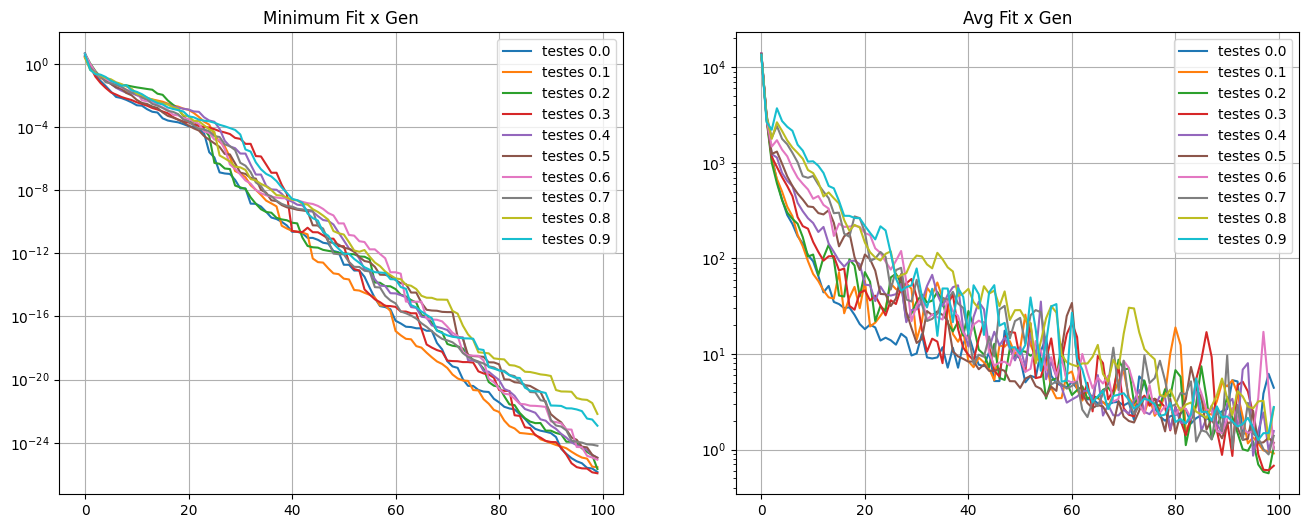

In [47]:
from graphical_visualization import get_last_best_ind
from graphical_visualization import store_average_fitness
from graphical_visualization import contour_over_population
from graphical_visualization import plot_fitness_over_generation

from algorithm_classes import LoopDEEPSO
from algorithm_loop import initial_random_pop

final_fitness_table = {}
final_fitness_table["mini"] = {}
final_fitness_table["mean"] = {}

# experiment to make and test title
experiment_name="deepso_rand_1"

num_tests = 20 # number of tests to make
bounds = [-5,5]
max_it=100
wi_initial=0
for i in range(0,10):
    title="testes "+str(wi_initial + i/10)
    final_fitness_table["mini"][title] = []
    final_fitness_table["mean"][title] = []
    deepso = LoopDEEPSO("deepso_rand_1", bounds, title,
                        population_size=30,
                        max_it=max_it,
                        tcom=0.9,
                        tmut=0.2,
                        #velocity_bounds=[-2,2],
                        w_bounds=[0,1],
                        wi_initial=wi_initial+i/10,
                        wa_initial=0.5,
                        wc_initial=0.5)
    
    
    for _ in range(0,num_tests):
      coordinates = initial_random_pop(population_size,bounds,dimensions=2)
      generation_data = deepso.test(coordinates,Rosenbrock)
      store_average_fitness(generation_data,final_fitness_table,title)

#contour_over_population(generation_data,', '.join(lazy_title),ff,bounds, save_path="animationDEEPSO.mp4")
plot_fitness_over_generation(final_fitness_table, num_tests)

#from IPython.display import Video
#Video("animationDEEPSO.mp4")